# Graph Ⅴ
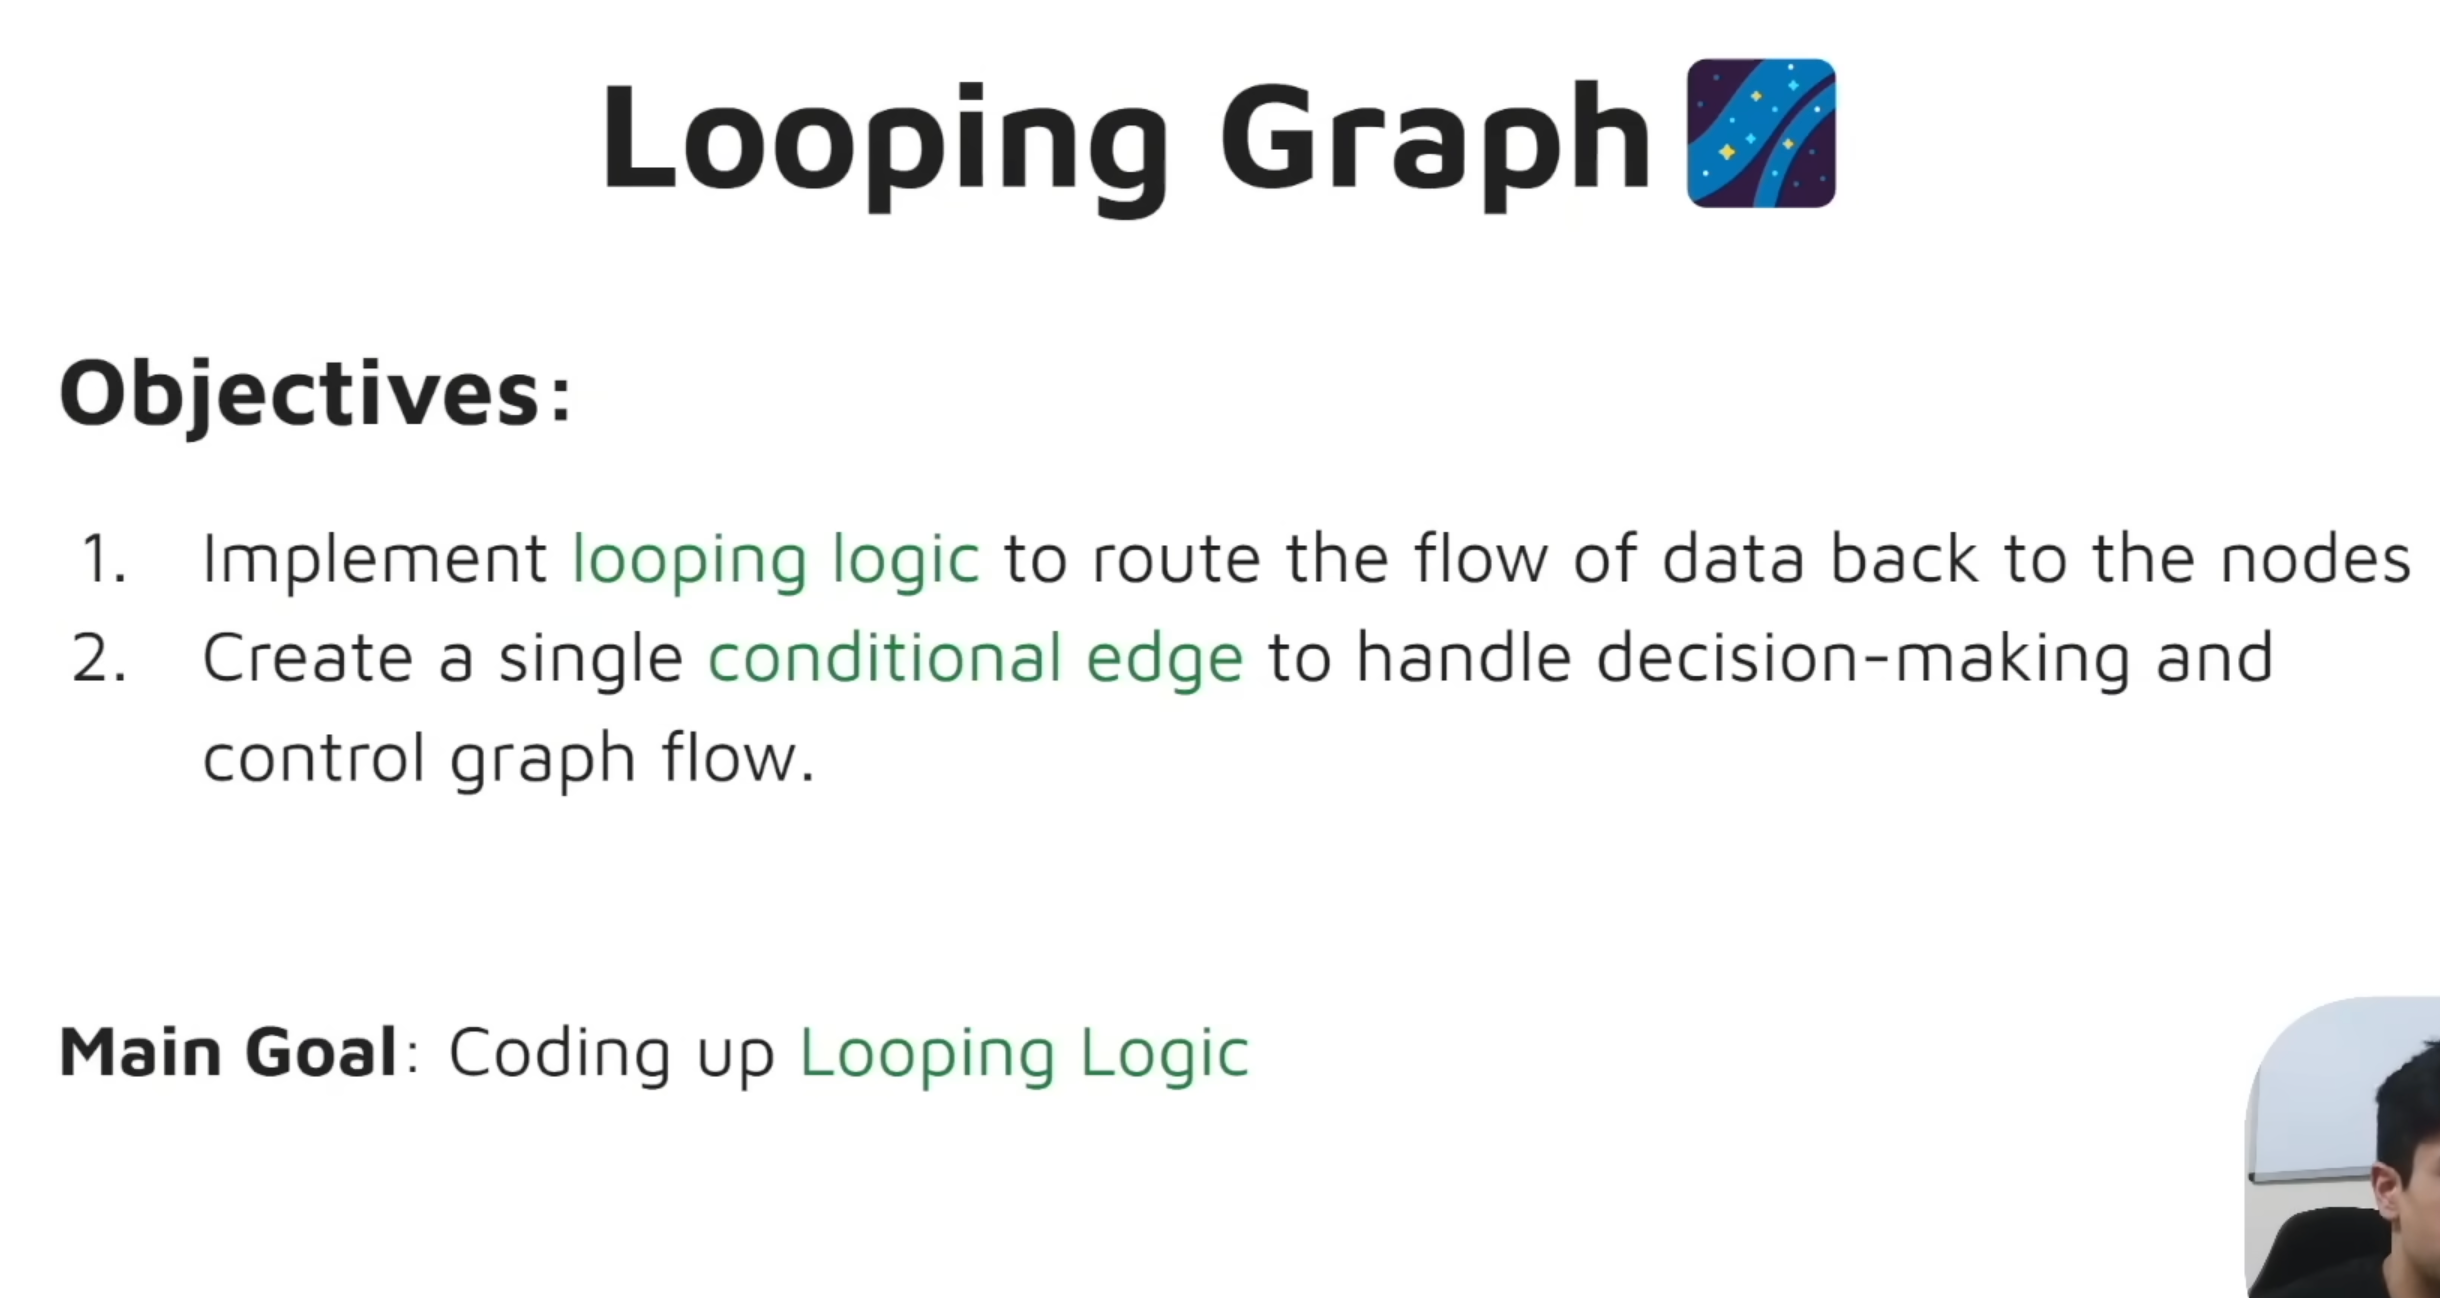

In [1]:
from langgraph.graph import StateGraph,START,END
import random
from typing import Dict,List,TypedDict,Optional
from dataclasses import dataclass

In [2]:
@dataclass
class AgentState(TypedDict):
    name:Optional[str]
    number:Optional[List[int]]
    counter:Optional[int]

In [3]:
def greeting_node(state: AgentState) -> AgentState:
    """Process greeting for the user.

    Args:
        state (AgentState): Current agent state containing user name

    Returns:
        AgentState: Updated state with greeting message and initialized counter
    """
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state


def random_node(state: AgentState) -> AgentState:
    """Generate and append a random number to the state.

    Args:
        state (AgentState): Current agent state containing number list

    Returns:
        AgentState: Updated state with new random number and incremented counter
    """
    state['number'].append(random.randint(0, 10))
    state['counter'] += 1
    return state


def should_continue(state: AgentState) -> str:
    """Determine whether to continue the loop or exit.

    Args:
        state (AgentState): Current agent state with counter value

    Returns:
        str: "loop" to continue processing, "exit" to terminate
    """
    if state['counter'] < 5:
        print("ENTERING LOOP", state['counter'])
        return "loop"
    else:
        return "exit"

In [4]:
graph=StateGraph(AgentState)
graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)
graph.add_edge(START,"greeting")
graph.add_edge("greeting","random")
graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop":"random",
        "exit":END
    }
)
app=graph.compile()

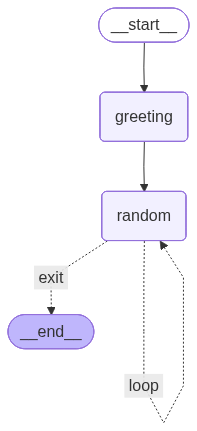

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
app.invoke({"name":"Dave","number":[],"counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Dave', 'number': [7, 8, 1, 2, 0], 'counter': 5}